In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
pd.read_csv('/content/owid-covid-data.csv')
df=pd.read_csv('/content/owid-covid-data.csv')
print (df)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
402789      ZWE    Africa     Zimbabwe  2024-05-15     266362.0        0.0   
402790      ZWE    Africa     Zimbabwe  2024-05-16     266362.0        0.0   
402791      ZWE    Africa     Zimbabwe  2024-05-17     266362.0        0.0   
402792      ZWE    Africa     Zimbabwe  2024-05-18     266362.0        0.0   
402793      ZWE    Africa     Zimbabwe  2024-05-19     266362.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [4]:
print("Dimensioni del dataset:", df.shape)


Dimensioni del dataset: (402794, 67)


In [6]:
print("Informazioni sul dataset:")
print(df.info())

Informazioni sul dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402794 entries, 0 to 402793
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    402794 non-null  object 
 1   continent                                   383500 non-null  object 
 2   location                                    402794 non-null  object 
 3   date                                        402794 non-null  object 
 4   total_cases                                 363712 non-null  float64
 5   new_cases                                   391526 non-null  float64
 6   new_cases_smoothed                          390296 non-null  float64
 7   total_deaths                                341117 non-null  float64
 8   new_deaths                                  391897 non-null  float64
 9   new_deaths_smoothed                         

In [7]:
df_continents = df.dropna(subset=['continent'])
continents_casi_totali = df_continents.groupby('continent')['total_cases'].sum()
print("Casi totali per continente:")
print(continents_casi_totali)


Casi totali per continente:
continent
Africa           1.360475e+10
Asia             2.289547e+11
Europe           2.172971e+11
North America    1.175176e+11
Oceania          1.044462e+10
South America    6.819703e+10
Name: total_cases, dtype: float64


In [11]:
def confronto_continenti(cont1, cont2):
    continenti = [cont1, cont2]
    stats = {}
    for cont in continenti:
        dati_cont = df_continents[df_continents['continent'] == cont]['total_cases']
        stats[cont] = {
            'max': dati_cont.max(),
            'mean': dati_cont.mean(),
            'percentage': dati_cont.sum() / df['total_cases'].sum() * 100
        }
    return stats

In [12]:
stats_confronto = confronto_continenti('Europe', 'Asia')
print("Confronto tra Europa e Asia:")
print(stats_confronto)

Confronto tra Europa e Asia:
{'Europe': {'max': 38997490.0, 'mean': 2762450.796226847, 'percentage': 7.816228462128401}, 'Asia': {'max': 99357895.0, 'mean': 3327539.853501148, 'percentage': 8.235553774411583}}


In [7]:
df_italia_2022 = df[(df['location'] == 'Italy') & (df['date'].str.startswith('2022'))]



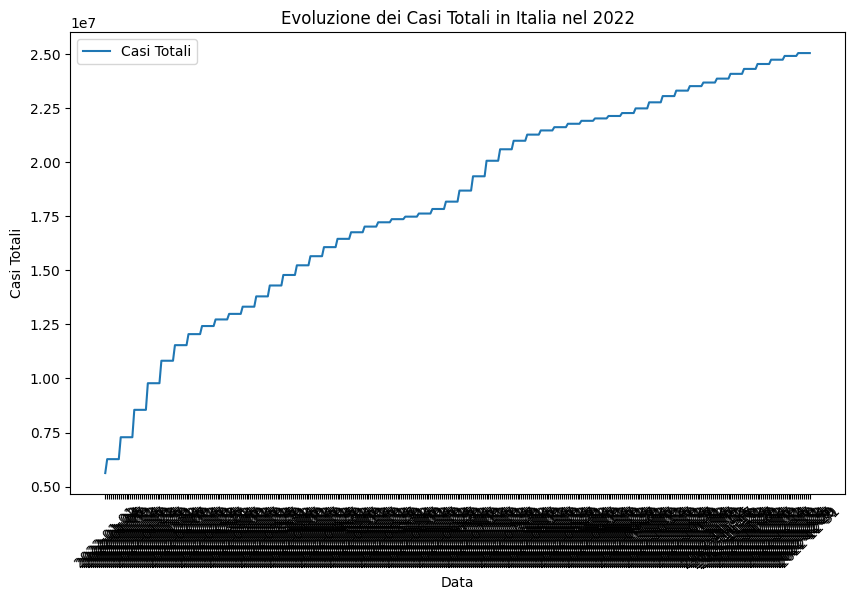

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(df_italia_2022['date'], df_italia_2022['total_cases'], label='Casi Totali')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.title('Evoluzione dei Casi Totali in Italia nel 2022')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [15]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

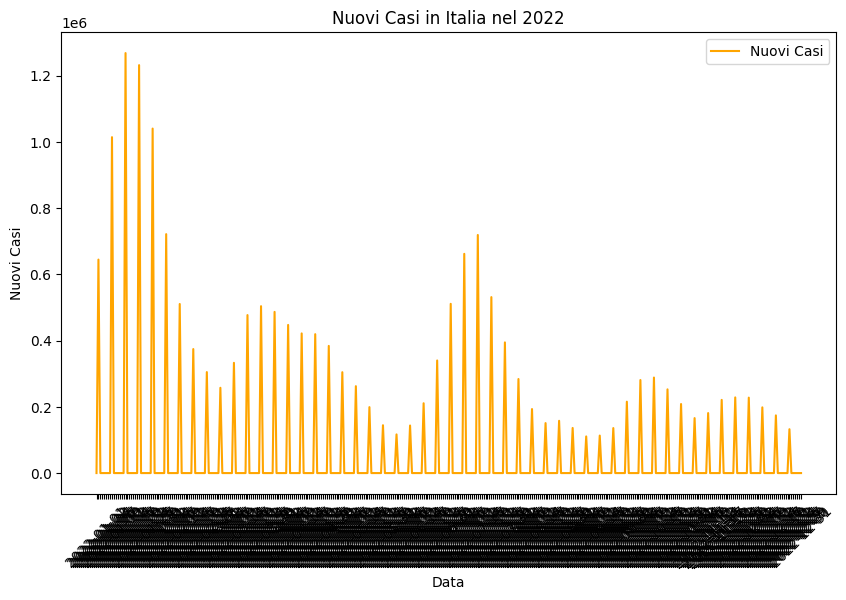

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df_italia_2022['date'], df_italia_2022['new_cases'], label='Nuovi Casi', color='orange')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.title('Nuovi Casi in Italia nel 2022')
plt.xticks(rotation=45)
plt.legend()
plt.show()

<ipython-input-11-603777afd21e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_italia_2022['cumulative_new_cases'] = df_italia_2022['new_cases'].cumsum()


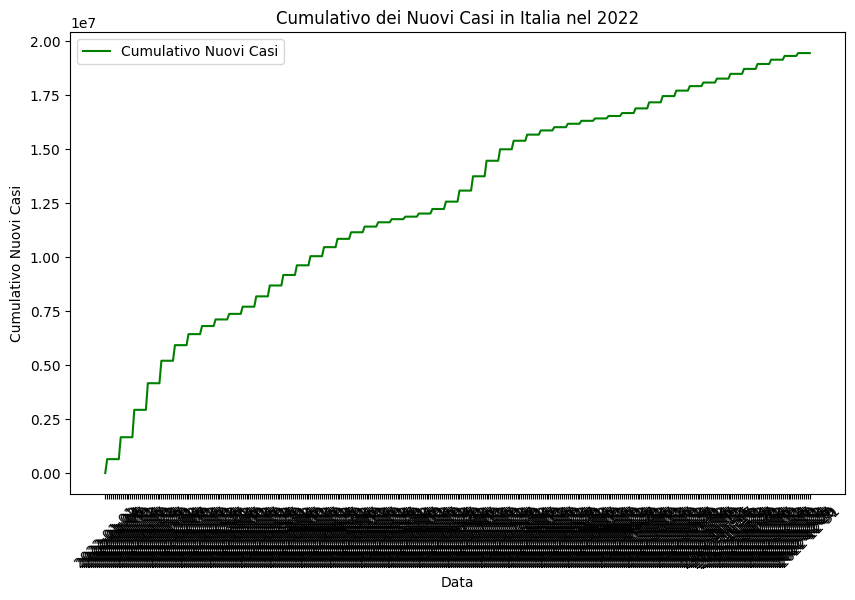

In [11]:
df_italia_2022['cumulative_new_cases'] = df_italia_2022['new_cases'].cumsum()
plt.figure(figsize=(10, 6))
plt.plot(df_italia_2022['date'], df_italia_2022['cumulative_new_cases'], label='Cumulativo Nuovi Casi', color='green')
plt.xlabel('Data')
plt.ylabel('Cumulativo Nuovi Casi')
plt.title('Cumulativo dei Nuovi Casi in Italia nel 2022')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [12]:
df_icu = df[(df['location'].isin(['Italy', 'Germany', 'France'])) &
            (df['date'] >= '2022-05-01') & (df['date'] <= '2023-04-30')]

<Figure size 1000x600 with 0 Axes>

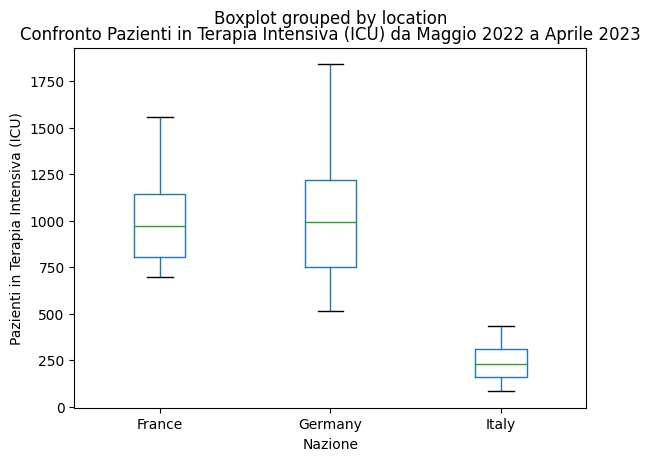

In [16]:
plt.figure(figsize=(10, 6))
df_icu.boxplot(column='icu_patients', by='location', grid=False)
plt.xlabel('Nazione')
plt.ylabel('Pazienti in Terapia Intensiva (ICU)')
plt.title('Confronto Pazienti in Terapia Intensiva (ICU) da Maggio 2022 a Aprile 2023')
plt.show()